In [ ]:
# !pip install matplotlib
# !pip install opencv-python
import cv2
import matplotlib.pyplot as plt

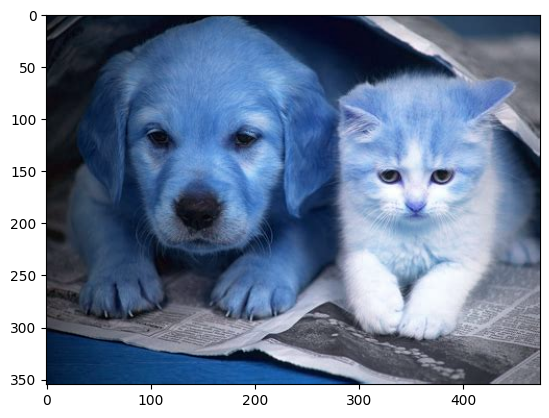

In [ ]:
image = cv2.imread('catanddog.jfif', 1)
original_image = image.copy()
plt.imshow(image)

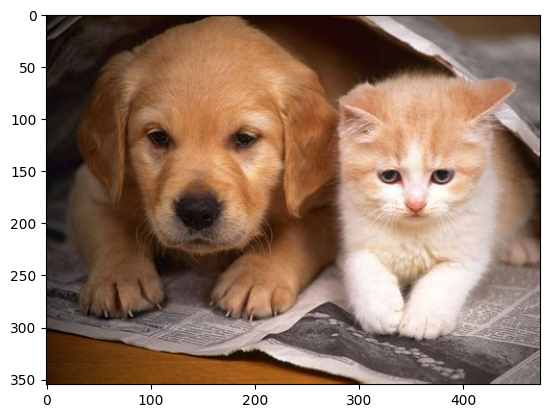

In [ ]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

In [ ]:
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

In [ ]:
classes = []
with open('coco.names', 'r') as f:
#     print(f.readlines())
    classes = [line.strip() for line in f.readlines()]
print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
classes[57]

'sofa'

In [ ]:
file = open('coco.names')
x = file.read()
print(x.split('\n'))
file.close()

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
layer_names = net.getLayerNames()
# output_layer = [layer_names[i[0]] for i in net.getUnconnectedOutLayers()]
# output_layer

In [ ]:
layer_names

('conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3',
 'bn_3',
 'leaky_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'leaky_6',
 'conv_6',
 'bn_6',
 'leaky_7',
 'conv_7',
 'bn_7',
 'leaky_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'leaky_10',
 'conv_10',
 'bn_10',
 'leaky_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'leaky_17',
 'conv_17',
 'bn_17',
 'leaky_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'leaky_20',
 'conv_20',
 'bn_20',
 'leaky_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'leaky_23',
 'conv_23',
 'bn_23',
 'leaky_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'leaky_26',
 'conv_26',
 'bn_26',
 'leaky_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'leaky_29',
 'conv_29',
 'bn_29',
 'leaky_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'leaky_32',
 'conv_32',
 'bn_32',
 'leaky_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'l

In [ ]:
output_layer = [layer_names[i-1] for i in net.getUnconnectedOutLayers()]

In [ ]:
output_layer

['yolo_82', 'yolo_94', 'yolo_106']

In [ ]:
height, width,depth = rgb_image.shape
height, width,depth

(355, 474, 3)

In [ ]:
blob = cv2.dnn.blobFromImage(rgb_image, 0.003, (224, 224), (0, 0, 0), True)


In [ ]:
blob

array([[[[0.012, 0.015, 0.024, ..., 0.096, 0.093, 0.099],
         [0.009, 0.024, 0.03 , ..., 0.093, 0.09 , 0.093],
         [0.012, 0.027, 0.021, ..., 0.093, 0.09 , 0.09 ],
         ...,
         [0.006, 0.003, 0.   , ..., 0.327, 0.324, 0.312],
         [0.021, 0.027, 0.006, ..., 0.321, 0.321, 0.345],
         [0.09 , 0.021, 0.012, ..., 0.324, 0.33 , 0.369]],

        [[0.036, 0.039, 0.042, ..., 0.159, 0.156, 0.162],
         [0.033, 0.042, 0.048, ..., 0.156, 0.153, 0.156],
         [0.036, 0.042, 0.039, ..., 0.156, 0.153, 0.153],
         ...,
         [0.072, 0.069, 0.072, ..., 0.33 , 0.327, 0.315],
         [0.06 , 0.084, 0.075, ..., 0.33 , 0.327, 0.345],
         [0.132, 0.075, 0.084, ..., 0.333, 0.336, 0.369]],

        [[0.075, 0.078, 0.075, ..., 0.225, 0.222, 0.228],
         [0.072, 0.075, 0.081, ..., 0.222, 0.219, 0.222],
         [0.069, 0.075, 0.069, ..., 0.222, 0.219, 0.219],
         ...,
         [0.156, 0.153, 0.162, ..., 0.36 , 0.357, 0.342],
         [0.144, 0.165, 0.

In [ ]:
net.setInput(blob)
outs = net.forward(output_layer)

In [ ]:
print(len(outs))
print(outs)

3
(array([[0.09287982, 0.10020752, 0.66329336, ..., 0.        , 0.        ,
        0.        ],
       [0.08927608, 0.06721203, 0.51619583, ..., 0.        , 0.        ,
        0.        ],
       [0.09213152, 0.08277708, 1.5146743 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9122991 , 0.90181696, 0.68061155, ..., 0.        , 0.        ,
        0.        ],
       [0.93047863, 0.9386261 , 0.46794716, ..., 0.        , 0.        ,
        0.        ],
       [0.94771355, 0.93422836, 1.5898371 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.04825758, 0.05124049, 0.12080622, ..., 0.        , 0.        ,
        0.        ],
       [0.04273397, 0.04686141, 0.4218499 , ..., 0.        , 0.        ,
        0.        ],
       [0.04509198, 0.03314932, 0.16119142, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.94193405, 0.9494218 , 0.11101923, ..., 0.        , 0.        ,
        0.        ],
       [0.958686

In [ ]:
len(outs[2])

2352

In [ ]:
len(outs[2])

2352

In [ ]:
outs[2][2001]

array([8.3827317e-01, 8.4051418e-01, 2.5709093e-02, 4.0446546e-02,
       2.6685841e-08, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

[16]
[0.9542977809906006]
[[13, -6, 290, 307]]
[0.33416915 0.41564894 0.6124024  0.8657653  0.993353   0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.9542978  0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[16, 16]
[0.9542977809906006, 0.6397875547409058]
[[13, -6, 290, 307], [-4, 4, 266, 317]]
[0.27246287 0.4595476  0

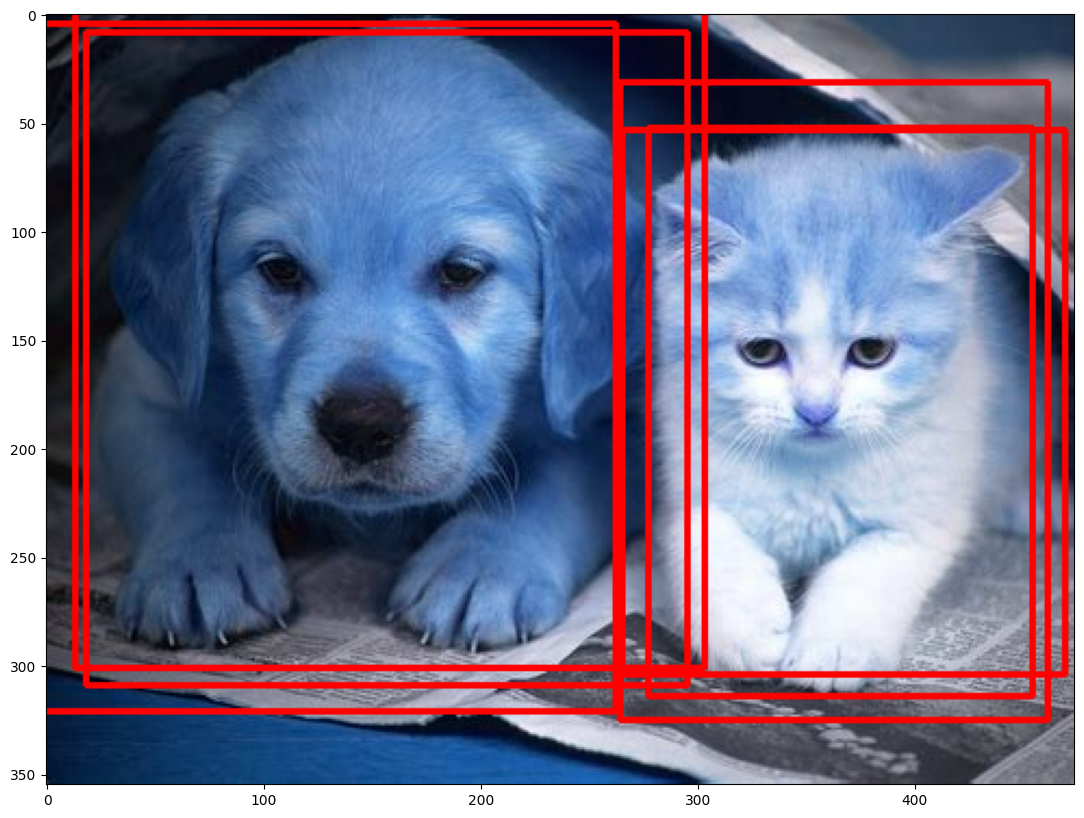

In [ ]:
# blob = cv2.dnn.blobFromImage(gray_image, 0.003, (512, 512), (0, 0, 0), True)
# net.setInput(blob)
# outs = net.forward(output_layer)

import numpy as np
class_ids = []
boxes = []
confidences = []

for out in outs:
    for det in out:
        scores = det[5:]
        class_id = np.argmax(scores)
        # print(class_id)
        confidence = scores[class_id]
        # if confidence > 0:
        #     print(class_id )
        #     print(det)

        if confidence > 0.6:
            # print(det)
            cx = int(det[0] * width)
            cy = int(det[1] * height)

            w = int(det[2] * width)
            h = int(det[3] * height)

            x, y = int(cx - w / 2), int(cy - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
            print(class_ids)
            print(confidences)
            print(boxes)
            print(det)
            cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
plt.figure(figsize = (20,10))
plt.imshow(image)

6
[2 3]
18 8 277 301
dog
265 53 204 251
cat


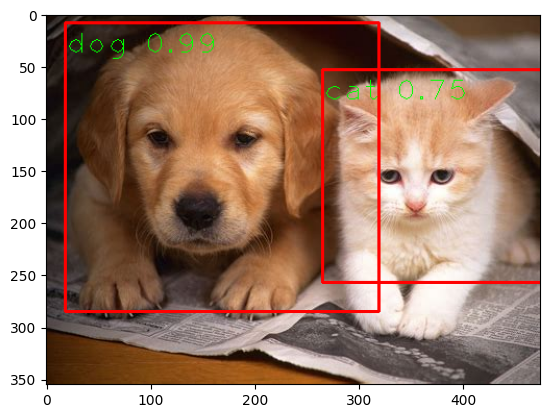

In [ ]:
n_det = len(boxes)
print(n_det)
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.3)
print(indexes)
for i in range(n_det):
    if i in indexes:
        x, y, w, h = boxes[i]
        print(x, y, w, h)
        label = str(classes[class_ids[i]])
        conf = confidences[i]
        print(label)
        cv2.rectangle(rgb_image, (x, y), (x+h, y+w), (255, 0, 0), 2)
        cv2.putText(rgb_image, f"{label} {round(conf,2)}", (x, y+30), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 1)

plt.imshow(rgb_image)